## Weights of the random sampler

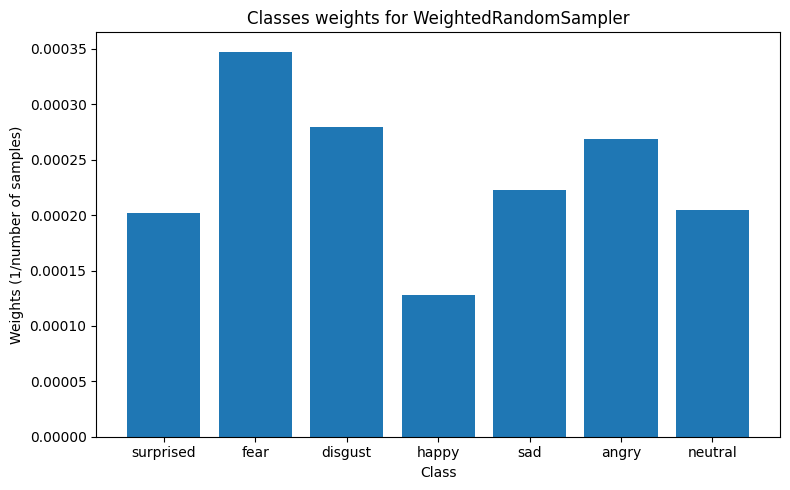

Classe | Nb samples | Poids
----------------------------
     0 |       4946 | 0.000202
     1 |       2877 | 0.000348
     2 |       3574 | 0.000280
     3 |       7795 | 0.000128
     4 |       4488 | 0.000223
     5 |       3720 | 0.000269
     6 |       4883 | 0.000205


In [5]:
import matplotlib.pyplot as plt
from collections import Counter

from dataset import EmotionDataset
from transforms import get_train_transforms

DATA_DIR = "../../data/aligned"
IMG_SIZE = 224

EMOTION_LABELS = {
    0: "surprised",
    1: "fear",
    2: "disgust",
    3: "happy",
    4: "sad",
    5: "angry",
    6: "neutral",
}

def main():
    dataset = EmotionDataset(
        root=f"{DATA_DIR}/train",
        transform=get_train_transforms(IMG_SIZE)
    )

    targets = dataset.targets
    class_counts = Counter(targets)

    # Même logique que dans ton DataModule
    class_weights = {
        cls: 1.0 / count
        for cls, count in class_counts.items()
    }

    # Tri pour un affichage propre
    classes = sorted(class_weights.keys())
    real_classes = [EMOTION_LABELS[lab] for lab in classes]
    weights = [class_weights[c] for c in classes]
    counts = [class_counts[c] for c in classes]

    # -------- Plot --------
    plt.figure(figsize=(8, 5))
    plt.bar(real_classes, weights)
    plt.xlabel("Class")
    plt.ylabel("Weights (1/number of samples)")
    plt.title("Classes weights for WeightedRandomSampler")
    plt.tight_layout()
    plt.show()

    # -------- Affichage console (utile) --------
    print("Classe | Nb samples | Poids")
    print("----------------------------")
    for c in classes:
        print(f"{c:6} | {class_counts[c]:10} | {class_weights[c]:.6f}")

if __name__ == "__main__":
    main()


## Augmentations

In [1]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import numpy as np


In [30]:
img_size = 224

augmentations = {
    "Original": transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor()
    ]),
    "RandomResizedCrop": transforms.Compose([
        transforms.RandomResizedCrop(img_size, scale=(0.8, 1.0)),
        transforms.ToTensor()
    ]),
    "HorizontalFlip": transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.RandomHorizontalFlip(p=1.0),
        transforms.ToTensor()
    ]),
    "RandAugment": transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.RandAugment(num_ops=2, magnitude=6),
        transforms.ToTensor()
    ]),
    "ColorJitter": transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ColorJitter(brightness=0.2, contrast=0.25),
        transforms.ToTensor()
    ])
}

viz_transforms = {
    "Original": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ]),

    "RandomResizedCrop": transforms.Compose([
        transforms.RandomResizedCrop(img_size, scale=(0.8, 1.0)),
        transforms.ToTensor()
    ]),

    " Random Horizontal Flip": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(p=1.0),
        transforms.ToTensor()
    ]),

    "RandAugment": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandAugment(num_ops=2, magnitude=6),
        transforms.ToTensor()
    ]),

    "Color Jitter": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ColorJitter(
            brightness=0.5,
            contrast=0.5,
            saturation=0.5
        ),
        transforms.ToTensor()
    ])
}



In [31]:
def show_augmentation_grid(image_path, augmentations, n_cols=4):
    image = Image.open(image_path).convert("RGB")
    n_rows = len(augmentations)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 3*n_rows))

    for row, (name, transform) in enumerate(augmentations.items()):
        for col in range(n_cols):
            img = transform(image)
            img = img.permute(1, 2, 0).numpy()
            img = np.clip(img, 0, 1)

            axes[row, col].imshow(img)
            axes[row, col].axis("off")

            # Title once per row
            if col == n_cols // 2:
                axes[row, col].set_title(name, fontsize=14, pad=10)

    plt.tight_layout()
    plt.show()


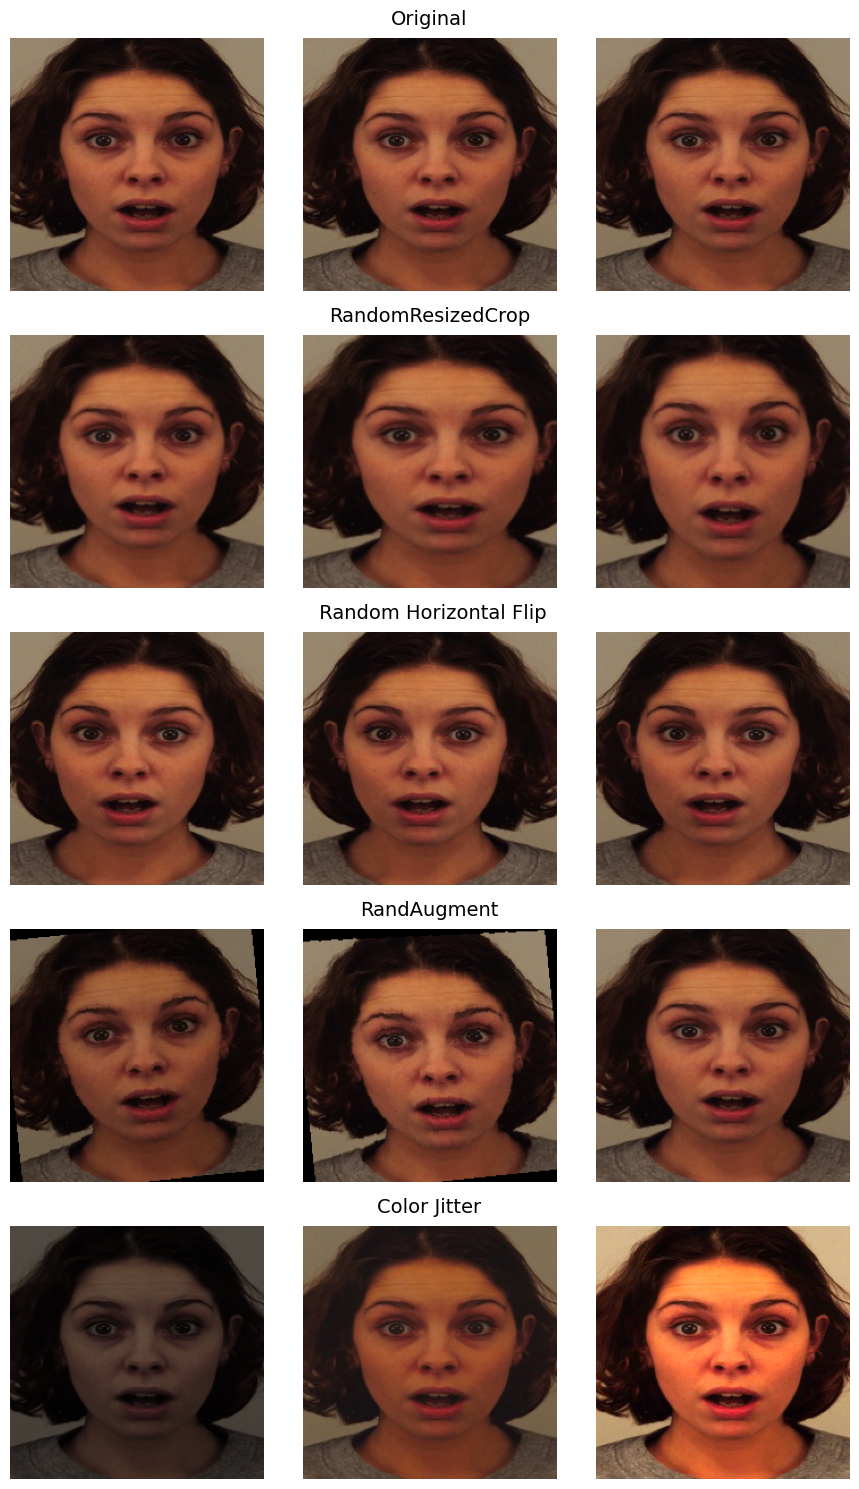

In [32]:
show_augmentation_grid(
    image_path="../../data/aligned/train/0/AF20SUS.JPG",
    augmentations=viz_transforms,
    n_cols=3
)